In [1]:
# Dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from scipy import stats
import numpy as np
from scipy.stats import linregress
import matplotlib
import time
import calendar
import gmaps

from config import g_key


# Analyze Total US Airline Data Domestic and International

In [2]:
# https://www.transtats.bts.gov/Data_Elements.aspx?Data=2
# US flight data for domestic and international
# *Most recent three months of international data by airport and by carrier withheld because of confidentiality agreements for individual routes. 
# Summary totals are shown for all airports and all carriers. 

flight_data_df = pd.read_csv('RawData/Flights_3_12_2020.csv')

In [3]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,"815,489","92,565","908,054"
1,2002,11,"766,775","91,342","858,117"
2,2002,12,"782,175","96,881","879,056"
3,2002,TOTAL,"8,085,083","1,023,994","9,109,077"
4,2003,1,"785,651","98,053","883,704"
...,...,...,...,...,...
224,2019,TOTAL,"8,591,641","1,620,275","10,211,916"
225,NaN,NaN,NaN,NaN,NaN
226,Note: All numbers are for scheduled services.,NaN,NaN,NaN,NaN
227,NaN,NaN,NaN,NaN,NaN


In [4]:
# Drop the last few rows which have null values
flight_data_df = flight_data_df.dropna(how='any')

# Drop the rows which have totals for each year
flight_data_df = flight_data_df[flight_data_df['Month'] != 'TOTAL']

In [5]:
# Make all columns as float
columns = flight_data_df.columns
for column in columns:
    flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

In [6]:
# Make Year and Month into integers
flight_data_df['Year'] = flight_data_df['Year'].astype(int)
flight_data_df['Month'] = flight_data_df['Month'].astype(int)

In [7]:
# Make a date column that uses the month and year and assumes the 1st of every month
Date = []
for y, m in zip(flight_data_df.Year, flight_data_df.Month):
    Date.append(datetime(y, m, 1))

flight_data_df['Date'] = Date

In [8]:
flight_data_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date
0,2002,10,815489.0,92565.0,908054.0,2002-10-01
1,2002,11,766775.0,91342.0,858117.0,2002-11-01
2,2002,12,782175.0,96881.0,879056.0,2002-12-01
4,2003,1,785651.0,98053.0,883704.0,2003-01-01
5,2003,2,690750.0,85965.0,776715.0,2003-02-01
...,...,...,...,...,...,...
219,2019,8,769346.0,147077.0,916423.0,2019-08-01
220,2019,9,703929.0,123258.0,827187.0,2019-09-01
221,2019,10,740139.0,126268.0,866407.0,2019-10-01
222,2019,11,694283.0,119996.0,814279.0,2019-11-01


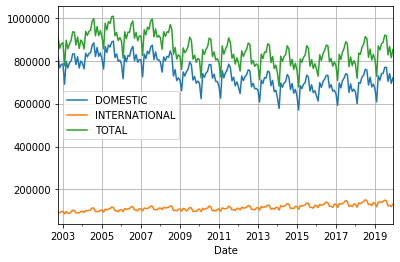

In [9]:
ax = plt.gca()
flight_data_df.plot.line(x = 'Date', y='DOMESTIC',ax=ax)
flight_data_df.plot.line(x = 'Date', y='INTERNATIONAL',ax=ax)
flight_data_df.plot.line(x = 'Date', y='TOTAL',ax=ax)
ax.grid()
plt.show()

# Ebola Data Analysis (Vikash Bhakta)

In [10]:
#https://data.humdata.org/dataset/ebola-cases-2014
ebola_df = pd.read_csv('RawData/ebola_data_db_format.csv')
ebola_df.head()

,Indicator,Country,Date,value
0,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,3285.0
1,Cumulative number of confirmed Ebola cases,Guinea,2015-03-10,2871.0
2,Cumulative number of probable Ebola cases,Guinea,2015-03-10,392.0
3,Cumulative number of suspected Ebola cases,Guinea,2015-03-10,22.0
4,"Cumulative number of confirmed, probable and s...",Guinea,2015-03-10,2170.0


In [11]:
ebola_df['Indicator'].value_counts()

Cumulative number of confirmed, probable and suspected Ebola deaths                            2485
Cumulative number of confirmed Ebola cases                                                     2484
Cumulative number of confirmed, probable and suspected Ebola cases                             2477
Cumulative number of probable Ebola cases                                                      2436
Cumulative number of suspected Ebola cases                                                     2366
Cumulative number of confirmed Ebola deaths                                                    1648
Cumulative number of probable Ebola deaths                                                     1526
Cumulative number of suspected Ebola deaths                                                    1308
Number of confirmed, probable and suspected Ebola cases in the last 21 days                     190
Number of confirmed Ebola cases in the last 21 days                                             190


In [12]:
# Keep the only two indicators I care about
ebola_df = ebola_df[(ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola cases')|
        (ebola_df['Indicator']=='Cumulative number of confirmed, probable and suspected Ebola deaths')]

# Pivot table on values and make new columns as indicators
ebola_df = ebola_df.pivot_table(values='value', index=['Country', 'Date'], columns=['Indicator'])
ebola_df= ebola_df.reset_index()
ebola_df

Indicator,Country,Date,"Cumulative number of confirmed, probable and suspected Ebola cases","Cumulative number of confirmed, probable and suspected Ebola deaths"
0,Guinea,2014-08-29,648.0,430.0
1,Guinea,2014-09-05,812.0,517.0
2,Guinea,2014-09-08,862.0,555.0
3,Guinea,2014-09-12,861.0,557.0
4,Guinea,2014-09-16,936.0,595.0
...,...,...,...,...
2480,United States of America,2015-12-17,4.0,1.0
2481,United States of America,2015-12-22,4.0,1.0
2482,United States of America,2015-12-23,4.0,1.0
2483,United States of America,2015-12-29,4.0,1.0


In [13]:
ebola_df['Country'].value_counts()

Guinea                      259
Liberia                     259
Sierra Leone                259
Nigeria                     255
Senegal                     254
United States of America    245
Mali                        243
Spain                       243
United Kingdom              221
Italy                       141
Liberia 2                   105
Guinea 2                      1
Name: Country, dtype: int64

In [14]:
# Fix country names
ebola_df['Country'] = ebola_df['Country'].replace({'Liberia 2': 'Liberia', 'Guinea 2': 'Liberia'})

# Rename columns
ebola_df = ebola_df.rename(columns=
                    {'Cumulative number of confirmed, probable and suspected Ebola deaths': 'Cumulative Number of Ebola Deaths',
                    'Cumulative number of confirmed, probable and suspected Ebola cases': 'Cumulative Number of Ebola Cases'})

# Sort by date and country
ebola_df = ebola_df.sort_values(by=['Date', 'Country'])
ebola_df

Indicator,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,Guinea,2014-08-29,648.0,430.0
401,Liberia,2014-08-29,1378.0,694.0
1008,Nigeria,2014-08-29,19.0,7.0
1517,Sierra Leone,2014-08-29,1026.0,422.0
1,Guinea,2014-09-05,812.0,517.0
...,...,...,...,...
1516,Senegal,2016-03-23,1.0,0.0
1775,Sierra Leone,2016-03-23,14122.0,3955.0
2018,Spain,2016-03-23,1.0,0.0
2239,United Kingdom,2016-03-23,1.0,0.0


In [15]:
# Get the last date for each county so we can get final data
last_ebola_data = ebola_df[ebola_df['Date'] == max(ebola_df['Date'])].reset_index()
last_ebola_data


Indicator,index,Country,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths
0,258,Guinea,2016-03-23,3804.0,2536.0
1,400,Italy,2016-03-23,1.0,0.0
2,259,Liberia,2016-03-23,5.0,4.0
3,659,Liberia,2016-03-23,10666.0,4806.0
4,764,Liberia,2016-03-23,9.0,3.0
5,1007,Mali,2016-03-23,8.0,6.0
6,1262,Nigeria,2016-03-23,20.0,8.0
7,1516,Senegal,2016-03-23,1.0,0.0
8,1775,Sierra Leone,2016-03-23,14122.0,3955.0
9,2018,Spain,2016-03-23,1.0,0.0


In [16]:
# Create and clean lat/lng csv
lat_lng_csv = "../group3/citycoords.csv"
lat_lng_df = pd.read_csv(lat_lng_csv)
lat_lng_df = lat_lng_df.rename(columns={"name_long": "Country"})
# lat_lng_df = lat_lng_df.replace(to_replace=['Ireland'],
#                 value='Republic of Ireland')

countries_lat_lng = pd.merge(last_ebola_data, lat_lng_df, on='Country')

countries_lat_lng = countries_lat_lng[['Country', 'Cumulative Number of Ebola Cases', 'Cumulative Number of Ebola Deaths', 'Longitude', 'Latitude']]

# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = countries_lat_lng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=countries_lat_lng['Cumulative Number of Ebola Cases'], 
                                 dissipating=False, max_intensity=70,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [17]:
# Get final counts for cases, deaths, and mortality rate
final_ebola_cases = last_ebola_data['Cumulative Number of Ebola Cases'].sum()
final_ebola_deaths = last_ebola_data['Cumulative Number of Ebola Deaths'].sum()
ebola_mortality_rate = final_ebola_deaths/final_ebola_deaths

In [18]:
# Get list of dates sorted
dates = ebola_df['Date'].unique().tolist()
dates.sort()

# Group by dates and sum of cases and deaths for each country on date
grouped_date_ebola = ebola_df.groupby('Date')
total_cases = grouped_date_ebola['Cumulative Number of Ebola Cases'].sum().tolist()
total_deathes = grouped_date_ebola['Cumulative Number of Ebola Deaths'].sum().tolist()

In [19]:
# Get cumulative number of cases and deaths across date
grouped_date_ebola =  pd.DataFrame({'Date': dates,
                                   'Cumulative Number of Ebola Cases': total_cases,
                                   'Cumulative Number of Ebola Deaths': total_deathes})

In [20]:
# Create columns that have the change of cases and deaths over the dates
daily_ebola_cases = [grouped_date_ebola.iloc[0,1]]
daily_ebola_deaths = [grouped_date_ebola.iloc[0,2]]

for x in range(1,len(grouped_date_ebola)):
    daily_case = grouped_date_ebola.iloc[x,1] - grouped_date_ebola.iloc[x-1,1]
    daily_ebola_cases.append(daily_case)
    daily_deaths = grouped_date_ebola.iloc[x,2] - grouped_date_ebola.iloc[x-1,2]
    daily_ebola_deaths.append(daily_deaths)
    
grouped_date_ebola['Change in Number of Ebola Cases'] = daily_ebola_cases
grouped_date_ebola['Change in Number of Ebola Deaths'] = daily_ebola_deaths
grouped_date_ebola

,Date,Cumulative Number of Ebola Cases,Cumulative Number of Ebola Deaths,Change in Number of Ebola Cases,Change in Number of Ebola Deaths
0,2014-08-29,3071.0,1553.0,3071.0,1553.0
1,2014-09-05,3967.0,2105.0,896.0,552.0
2,2014-09-08,4293.0,2296.0,326.0,191.0
3,2014-09-12,4390.0,2226.0,97.0,-70.0
4,2014-09-16,4985.0,2461.0,595.0,235.0
...,...,...,...,...,...
254,2015-12-17,28638.0,11315.0,-2.0,0.0
255,2015-12-22,28637.0,11315.0,-1.0,0.0
256,2015-12-23,28637.0,11315.0,0.0,0.0
257,2015-12-29,28637.0,11315.0,0.0,0.0


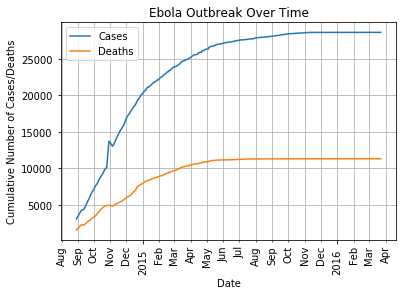

In [21]:
summed_dates = []
for row in grouped_date_ebola['Date']:
    summed_dates.append(matplotlib.dates.date2num(datetime.strptime(row, '%Y-%m-%d')))

cases_over_time, = plt.plot(summed_dates, grouped_date_ebola['Cumulative Number of Ebola Cases'], label="Cases")
deaths_over_time, = plt.plot(summed_dates, grouped_date_ebola['Cumulative Number of Ebola Deaths'], label="Deaths")

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=5)
plt.xticks(rotation=90)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

plt.title("Ebola Outbreak Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Number of Cases/Deaths")
plt.legend(handles=[cases_over_time, deaths_over_time], loc="best")
plt.grid(which='both')
plt.show()

In [22]:
# Create new column that has month and year so we can compare with flight data later
grouped_date_ebola['Month and Year'] = pd.to_datetime(grouped_date_ebola['Date']).dt.to_period('M')
grouped_ebola = grouped_date_ebola.groupby('Month and Year')
grouped_ebola = grouped_ebola.sum()

In [23]:
# Create new dataframe that has it monthly cases and years
grouped_monthly_ebola =  pd.DataFrame({'Monthly Number of Ebola Cases': grouped_ebola['Change in Number of Ebola Cases'],
                                   'Monthly Number of Ebola Deaths': grouped_ebola['Change in Number of Ebola Deaths']})

grouped_monthly_ebola = grouped_monthly_ebola.reset_index()
# Make new columns for each month and year so we can merge with flight data
grouped_monthly_ebola['Month'] = grouped_monthly_ebola['Month and Year'].dt.month
grouped_monthly_ebola['Year'] = grouped_monthly_ebola['Month and Year'].dt.year

grouped_monthly_ebola

,Month and Year,Monthly Number of Ebola Cases,Monthly Number of Ebola Deaths,Month,Year
0,2014-08,3071.0,1553.0,8,2014
1,2014-09,3503.0,1538.0,9,2014
2,2014-10,6993.0,1860.0,10,2014
3,2014-11,2368.0,738.0,11,2014
4,2014-12,4270.0,2216.0,12,2014
5,2015-01,1954.0,939.0,1,2015
6,2015-02,1701.0,831.0,2,2015
7,2015-03,1132.0,690.0,3,2015
8,2015-04,1333.0,540.0,4,2015
9,2015-05,766.0,252.0,5,2015


In [24]:
ebola_flight_data = pd.read_csv('RawData/Ebola_Top3Countries_2013-2017.csv')
ebola_flight_data

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,14,0,0,5068,DL,Delta Air Lines Inc.,10397,ATL,US,United States,14575,ROB,LR,Liberia,2013,10
1,18,0,0,5068,DL,Delta Air Lines Inc.,14575,ROB,LR,Liberia,10397,ATL,US,United States,2013,4
2,25,0,0,5068,DL,Delta Air Lines Inc.,14575,ROB,LR,Liberia,10397,ATL,US,United States,2013,9
3,31,0,0,5068,DL,Delta Air Lines Inc.,10397,ATL,US,United States,14575,ROB,LR,Liberia,2013,8
4,31,0,0,5068,DL,Delta Air Lines Inc.,14575,ROB,LR,Liberia,10397,ATL,US,United States,2013,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,4600,2235,0,5844,DL,Delta Air Lines Inc.,10397,ATL,US,United States,13043,LOS,NG,Nigeria,2017,7
668,4674,93442,0,5844,DL,Delta Air Lines Inc.,13043,LOS,NG,Nigeria,10397,ATL,US,United States,2017,6
669,5112,2194,0,5844,DL,Delta Air Lines Inc.,10397,ATL,US,United States,13043,LOS,NG,Nigeria,2017,8
670,5126,93985,0,5844,DL,Delta Air Lines Inc.,13043,LOS,NG,Nigeria,10397,ATL,US,United States,2017,7


In [25]:
# Make a Month and Year column
Date = []
for y, m in zip(ebola_flight_data.YEAR, ebola_flight_data.MONTH):
    Date.append(datetime(y, m,1))
ebola_flight_data['Date'] = Date 
ebola_flight_data['Month and Year'] = pd.to_datetime(ebola_flight_data['Date']).dt.to_period('M')

# Get number of flights per month/year
monthly_flights_ebola = ebola_flight_data['Month and Year'].value_counts().rename_axis('Month and Year').reset_index(name='Flights')
monthly_flights_ebola = monthly_flights_ebola.sort_values(by=['Month and Year'])
monthly_flights_ebola


,Month and Year,Flights
16,2013-01,15
1,2013-02,17
24,2013-03,14
20,2013-04,15
23,2013-05,14
8,2013-06,16
2,2013-07,17
19,2013-08,15
3,2013-09,17
22,2013-10,14


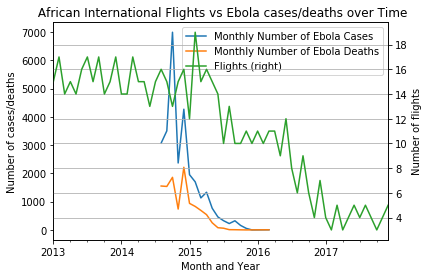

In [26]:
ax = plt.gca()
grouped_monthly_ebola.plot.line(x = 'Month and Year', y='Monthly Number of Ebola Cases',ax=ax)
grouped_monthly_ebola.plot.line(x = 'Month and Year', y='Monthly Number of Ebola Deaths',ax=ax)
monthly_flights_ebola.plot.line(x = 'Month and Year', y='Flights',ax=ax, secondary_y = True)
plt.title(" African International Flights vs Ebola cases/deaths over Time")
ax.set_ylabel('Number of cases/deaths')
ax.right_ax.set_ylabel('Number of flights')
plt.grid()
plt.show()

In [27]:
merged_ebola_flight_data = pd.merge(monthly_flights_ebola, grouped_monthly_ebola, on=['Month and Year'])
merged_ebola_flight_data

,Month and Year,Flights,Monthly Number of Ebola Cases,Monthly Number of Ebola Deaths,Month,Year
0,2014-08,16,3071.0,1553.0,8,2014
1,2014-09,15,3503.0,1538.0,9,2014
2,2014-10,13,6993.0,1860.0,10,2014
3,2014-11,15,2368.0,738.0,11,2014
4,2014-12,16,4270.0,2216.0,12,2014
5,2015-01,12,1954.0,939.0,1,2015
6,2015-02,19,1701.0,831.0,2,2015
7,2015-03,15,1132.0,690.0,3,2015
8,2015-04,16,1333.0,540.0,4,2015
9,2015-05,15,766.0,252.0,5,2015


The r-squared is: 0.42816833453750464


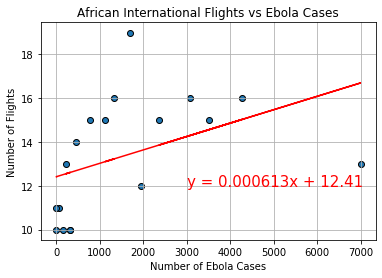

In [28]:
# Build a scatter plot
plt.scatter(merged_ebola_flight_data["Monthly Number of Ebola Cases"], merged_ebola_flight_data["Flights"], marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.title("African International Flights vs Ebola Cases")
plt.ylabel("Number of Flights")
plt.xlabel("Number of Ebola Cases")
plt.grid(True)

x_values = merged_ebola_flight_data["Monthly Number of Ebola Cases"]
y_values = merged_ebola_flight_data["Flights"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(3000,12),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()


# SARS Data Analysis (Ryan Ashcraft)

In [29]:
# Create a reference the CSV file desired
SARS_csv = "../group3/RawData/sars_2003_complete_dataset_clean.csv"

# Read the CSV into a Pandas DataFrame
SARS_df = pd.read_csv(SARS_csv)

SARS_df

,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2003-03-17,Germany,1,0,0
1,2003-03-17,Canada,8,2,0
2,2003-03-17,Singapore,20,0,0
3,2003-03-17,"Hong Kong SAR, China",95,1,0
4,2003-03-17,Switzerland,2,0,0
...,...,...,...,...,...
2533,2003-07-11,Switzerland,1,0,1
2534,2003-07-11,Thailand,9,2,7
2535,2003-07-11,United Kingdom,4,0,4
2536,2003-07-11,United States,75,0,67


In [30]:
grouped_SARS = SARS_df.groupby('Date')
cumulative_SARS = grouped_SARS.sum()

SARS_summary = pd.DataFrame({
                             "Case Count": cumulative_SARS['Cumulative number of case(s)'],
                             "Death Count": cumulative_SARS['Number of deaths'],
                             "Recovered Count": cumulative_SARS['Number recovered']
                            })

SARS_summary = SARS_summary.reset_index()
SARS_summary

,Date,Case Count,Death Count,Recovered Count
0,2003-03-17,167,4,0
1,2003-03-18,219,4,0
2,2003-03-19,264,9,0
3,2003-03-20,306,10,0
4,2003-03-21,350,10,0
...,...,...,...,...
91,2003-07-07,8434,812,7426
92,2003-07-08,8431,812,7428
93,2003-07-09,8431,812,7438
94,2003-07-10,8432,812,7444


In [31]:
# Combine Chinese Data
SARS_china = SARS_df.replace(to_replace=['Hong Kong SAR, China', 'Macao SAR, China', 'Taiwan, China'],
                value='China')
SARS_final = SARS_china.replace(to_replace=['Viet Nam'],
                value='Vietnam')

country_totals = SARS_final[SARS_final['Date'] == max(SARS_final['Date'])].reset_index()
country_totals

,index,Date,Country,Cumulative number of case(s),Number of deaths,Number recovered
0,2507,2003-07-11,Brazil,1,0,1
1,2508,2003-07-11,Canada,250,38,194
2,2509,2003-07-11,China,5327,348,4941
3,2510,2003-07-11,China,1755,298,1433
4,2511,2003-07-11,China,1,0,1
5,2512,2003-07-11,China,671,84,507
6,2513,2003-07-11,Colombia,1,0,1
7,2514,2003-07-11,Finland,1,0,1
8,2515,2003-07-11,France,7,1,6
9,2516,2003-07-11,Germany,10,0,9


In [32]:
grouped_countries = country_totals.groupby('Country')
grouped_countries = grouped_countries.sum()
grouped_countries = grouped_countries.drop(['index'], axis=1)

country_summary = pd.DataFrame({
                             "Case Count": grouped_countries['Cumulative number of case(s)'],
                             "Death Count": grouped_countries['Number of deaths'],
                             "Recovered Count": grouped_countries['Number recovered'],
                             "Mortality Rate": 100*(grouped_countries['Number of deaths']/grouped_countries['Cumulative number of case(s)'])
                            })

country_summary['Mortality Rate'] = country_summary['Mortality Rate'].map("{:.2f}%".format)

country_summary

,Case Count,Death Count,Recovered Count,Mortality Rate
Country,,,,
Brazil,1,0,1,0.00%
Canada,250,38,194,15.20%
China,7754,730,6882,9.41%
Colombia,1,0,1,0.00%
Finland,1,0,1,0.00%
France,7,1,6,14.29%
Germany,10,0,9,0.00%
India,3,0,3,0.00%
Indonesia,2,0,2,0.00%


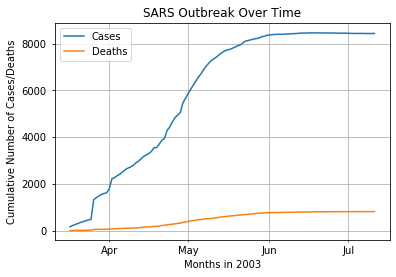

In [33]:
summed_dates = []
for row in SARS_summary['Date']:
    summed_dates.append(matplotlib.dates.date2num(datetime.strptime(row, '%Y-%m-%d')))

cases_over_time, = plt.plot(summed_dates, SARS_summary['Case Count'], label="Cases")
deaths_over_time, = plt.plot(summed_dates, SARS_summary['Death Count'], label="Deaths")

# x_axis = dates
# y_axis = SARS_summary['Case Count']

ax = plt.gca()
ax.xaxis.set_minor_locator(matplotlib.dates.MonthLocator())
ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%b'))
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
ax.tick_params(pad=5)

# ax.plot(x_axis, y_axis)
plt.title("SARS Outbreak Over Time")
plt.xlabel("Months in 2003")
plt.ylabel("Cumulative Number of Cases/Deaths")
plt.legend(handles=[cases_over_time, deaths_over_time], loc="best")
plt.grid(which='both')
plt.savefig('Plots/SARS_Over_Time.png')
plt.show()

# SARS Heatmap

In [34]:
# Create and clean lat/lng csv
lat_lng_csv = "../group3/citycoords.csv"
lat_lng_df = pd.read_csv(lat_lng_csv)
lat_lng_df = lat_lng_df.rename(columns={"name_long": "Country"})
lat_lng_df = lat_lng_df.replace(to_replace=['Ireland'],
                value='Republic of Ireland')

countries_lat_lng = pd.merge(country_summary, lat_lng_df, on='Country')

countries_lat_lng = countries_lat_lng[['Country', 'Case Count', 'Death Count', 'Recovered Count', 'Mortality Rate', 'Longitude', 'Latitude']]

# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = countries_lat_lng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=countries_lat_lng['Case Count'], 
                                 dissipating=False, max_intensity=70,
                                 point_radius=5)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [35]:
SARS_cases = country_summary['Case Count'].sum()

SARS_deaths = country_summary['Death Count'].sum()

s_final_summary = pd.DataFrame({'Cases': [SARS_cases],
                              'Deaths': [SARS_deaths]
                            })

s_final_summary['Mortality Rate'] = 100*(s_final_summary['Deaths']/s_final_summary['Cases'])
s_final_summary['Mortality Rate'] = s_final_summary['Mortality Rate'].map("{:.2f}%".format)


s_final_summary

,Cases,Deaths,Mortality Rate
0,8432,813,9.64%


# SARS Flight Data

In [36]:
daily_SARS_cases = [SARS_summary.iloc[0,1]]
daily_SARS_deaths = [SARS_summary.iloc[0,2]]
for x in range(1,len(SARS_summary)):
    daily_case = SARS_summary.iloc[x,1] - SARS_summary.iloc[x-1,1]
    daily_SARS_cases.append(daily_case)
    daily_deaths = SARS_summary.iloc[x,2] - SARS_summary.iloc[x-1,2]
    daily_SARS_deaths.append(daily_deaths)

daily_SARS_cases
daily_SARS_deaths

SARS_summary['Daily Cases'] = daily_SARS_cases
SARS_summary['Daily Deaths'] = daily_SARS_deaths

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths
0,2003-03-17,167,4,0,167,4
1,2003-03-18,219,4,0,52,0
2,2003-03-19,264,9,0,45,5
3,2003-03-20,306,10,0,42,1
4,2003-03-21,350,10,0,44,0
...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0
92,2003-07-08,8431,812,7428,-3,0
93,2003-07-09,8431,812,7438,0,0
94,2003-07-10,8432,812,7444,1,0


In [37]:
SARS_summary['Month and Year'] = pd.to_datetime(SARS_summary['Date']).dt.to_period('M')

SARS_summary

,Date,Case Count,Death Count,Recovered Count,Daily Cases,Daily Deaths,Month and Year
0,2003-03-17,167,4,0,167,4,2003-03
1,2003-03-18,219,4,0,52,0,2003-03
2,2003-03-19,264,9,0,45,5,2003-03
3,2003-03-20,306,10,0,42,1,2003-03
4,2003-03-21,350,10,0,44,0,2003-03
...,...,...,...,...,...,...,...
91,2003-07-07,8434,812,7426,0,0,2003-07
92,2003-07-08,8431,812,7428,-3,0,2003-07
93,2003-07-09,8431,812,7438,0,0,2003-07
94,2003-07-10,8432,812,7444,1,0,2003-07


In [38]:
monthly_grouping = SARS_summary.groupby('Month and Year')
monthly_grouping = monthly_grouping.sum()
monthly_grouping

monthly_sars_summary = pd.DataFrame({'Monthly Cases': monthly_grouping['Daily Cases'],
                                     'Monthly Deaths': monthly_grouping['Daily Deaths'],
                                     })

monthly_sars_summary = monthly_sars_summary.reset_index()
monthly_sars_summary['Month'] = monthly_sars_summary['Month and Year'].dt.month
monthly_sars_summary['Year'] = monthly_sars_summary['Month and Year'].dt.year

monthly_sars_summary

,Month and Year,Monthly Cases,Monthly Deaths,Month,Year
0,2003-03,1622,58,3,2003
1,2003-04,4037,314,4,2003
2,2003-05,2695,392,5,2003
3,2003-06,93,47,6,2003
4,2003-07,-15,2,7,2003


In [39]:
sars_flight_df = pd.read_csv('RawData/sars_flight_data_2002-2004.csv')

In [40]:
sars_flight_df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,213627,0,6151,MU,China Eastern Airlines,14309,PVG,CN,China,14771,SFO,US,United States,2002,10
1,0,4055,0,5494,CA,Air China,14066,PEK,CN,China,14057,PDX,US,United States,2002,12
2,0,19826,0,6754,FX,Federal Express Corporation,14066,PEK,CN,China,12339,IND,US,United States,2002,12
3,0,1195674,0,7773,CZ,China Southern Airlines,13930,ORD,US,United States,15113,SZX,CN,China,2002,12
4,0,790062,0,6580,CA,Air China,14066,PEK,CN,China,13930,ORD,US,United States,2002,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6


In [41]:
# Drop the last few rows which have null values
sars_flight_df = sars_flight_df.dropna(how='any')
sars_flight_df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
0,0,213627,0,6151,MU,China Eastern Airlines,14309,PVG,CN,China,14771,SFO,US,United States,2002,10
1,0,4055,0,5494,CA,Air China,14066,PEK,CN,China,14057,PDX,US,United States,2002,12
2,0,19826,0,6754,FX,Federal Express Corporation,14066,PEK,CN,China,12339,IND,US,United States,2002,12
3,0,1195674,0,7773,CZ,China Southern Airlines,13930,ORD,US,United States,15113,SZX,CN,China,2002,12
4,0,790062,0,6580,CA,Air China,14066,PEK,CN,China,13930,ORD,US,United States,2002,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6


In [42]:
# Drop the rows which have totals for each year
sars_flight_df = sars_flight_df[sars_flight_df['PASSENGERS'] != 0]
sars_flight_df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
498,2,0,0,7384,NW,Northwest Airlines Inc.,11618,EWR,US,United States,14309,PVG,CN,China,2002,6
499,3,0,3735,6840,UA,United Air Lines Inc.,12478,JFK,US,United States,14066,PEK,CN,China,2002,1
500,3,0,0,6840,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,3
501,5,0,0,6838,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,12
502,5,0,0,6933,NW,Northwest Airlines Inc.,11278,DCA,US,United States,14066,PEK,CN,China,2002,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6


In [43]:
Date = []
for y, m in zip(sars_flight_df.YEAR, sars_flight_df.MONTH):
    Date.append(datetime(y, m, 1))

sars_flight_df['Date'] = Date

sars_flight_df

/Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST_AIRPORT_ID,DEST,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH,Date
498,2,0,0,7384,NW,Northwest Airlines Inc.,11618,EWR,US,United States,14309,PVG,CN,China,2002,6,2002-06-01
499,3,0,3735,6840,UA,United Air Lines Inc.,12478,JFK,US,United States,14066,PEK,CN,China,2002,1,2002-01-01
500,3,0,0,6840,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,3,2002-03-01
501,5,0,0,6838,UA,United Air Lines Inc.,14066,PEK,CN,China,12478,JFK,US,United States,2002,12,2002-12-01
502,5,0,0,6933,NW,Northwest Airlines Inc.,11278,DCA,US,United States,14066,PEK,CN,China,2002,6,2002-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37539,10798,1055718,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,12,2004-12-01
37540,11027,1223354,0,8758,SQ,Singapore Airlines Ltd.,14824,SIN,SG,Singapore,12892,LAX,US,United States,2004,8,2004-08-01
37541,11190,614194,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,5,2004-05-01
37542,12023,841471,0,8758,SQ,Singapore Airlines Ltd.,12892,LAX,US,United States,14824,SIN,SG,Singapore,2004,6,2004-06-01


In [44]:
grouped_sars_flights = sars_flight_df.groupby('Date')
sars_flights_by_date = grouped_sars_flights.count()
sars_flights_by_date = sars_flights_by_date.reset_index()
sars_flights_by_date['MONTH'] = sars_flights_by_date['Date'].dt.month
sars_flights_by_date['YEAR'] = sars_flights_by_date['Date'].dt.year

sars_flights_summary = pd.DataFrame({'Date': sars_flights_by_date['Date'],
                                     'Flights per Month': sars_flights_by_date['PASSENGERS'],
                                     'Month': sars_flights_by_date['MONTH'],
                                     'Year': sars_flights_by_date['YEAR']
                                    })

sars_flights_summary

,Date,Flights per Month,Month,Year
0,2002-01-01,702,1,2002
1,2002-02-01,694,2,2002
2,2002-03-01,677,3,2002
3,2002-04-01,824,4,2002
4,2002-05-01,692,5,2002
5,2002-06-01,787,6,2002
6,2002-07-01,635,7,2002
7,2002-08-01,641,8,2002
8,2002-09-01,663,9,2002
9,2002-10-01,770,10,2002


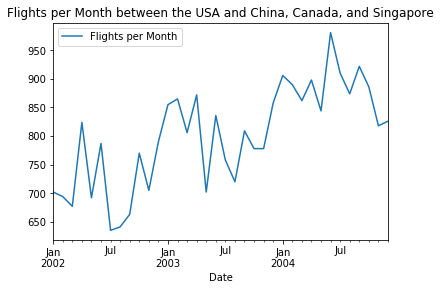

In [45]:
ax = plt.gca()
sars_flights_summary.plot.line(x ='Date', y='Flights per Month',ax=ax)
plt.title('Flights per Month between the USA and China, Canada, and Singapore')
plt.show()

In [46]:
sars_flight_data = pd.merge(sars_flights_summary, monthly_sars_summary, on=['Month', 'Year'])

sars_flight_data

,Date,Flights per Month,Month,Year,Month and Year,Monthly Cases,Monthly Deaths
0,2003-03-01,806,3,2003,2003-03,1622,58
1,2003-04-01,872,4,2003,2003-04,4037,314
2,2003-05-01,702,5,2003,2003-05,2695,392
3,2003-06-01,836,6,2003,2003-06,93,47
4,2003-07-01,758,7,2003,2003-07,-15,2


The r-squared is: 0.18240176997220128


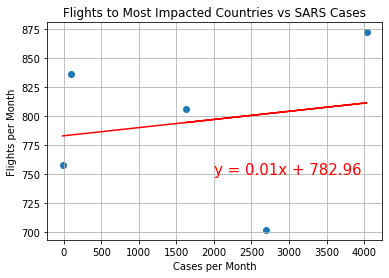

In [47]:
#run scatter plot and calculate r square
x_values = sars_flight_data['Monthly Cases']
y_values = sars_flight_data['Flights per Month']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2000,750),fontsize=15,color="red")
plt.xlabel('Cases per Month')
plt.ylabel('Flights per Month')
plt.title("Flights to Most Impacted Countries vs SARS Cases")
print(f"The r-squared is: {rvalue}")
plt.savefig('Plots/SARS_Flight_Scatter.png')
plt.grid(which='both')
plt.show()


In [48]:
#create average dataframe
avg_flight_df = sars_flights_summary.groupby(['Month']).mean()

#drop Year columns
del avg_flight_df['Year']

avg_flight_df.head()

,Flights per Month
Month,
1,821.000000
2,816.333333
3,781.666667
4,864.666667
5,746.000000


In [49]:
#do a second merge to add average data frame
flights_w_avg = pd.merge(sars_flight_data, avg_flight_df, on = 'Month', how = "inner", suffixes = ("", "_AVG"))

flights_w_avg

,Date,Flights per Month,Month,Year,Month and Year,Monthly Cases,Monthly Deaths,Flights per Month_AVG
0,2003-03-01,806,3,2003,2003-03,1622,58,781.666667
1,2003-04-01,872,4,2003,2003-04,4037,314,864.666667
2,2003-05-01,702,5,2003,2003-05,2695,392,746.000000
3,2003-06-01,836,6,2003,2003-06,93,47,868.000000
4,2003-07-01,758,7,2003,2003-07,-15,2,767.666667


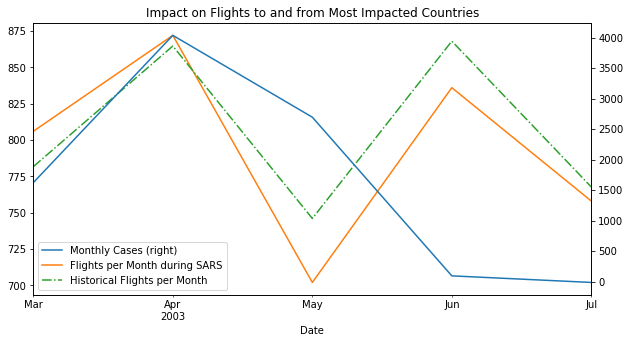

In [50]:
plt.figure(figsize = (10,5))
ax = plt.gca()

flights_w_avg.plot.line(x='Date', y='Monthly Cases', ax=ax, secondary_y = True)
flights_w_avg.plot.line(x='Date', y='Flights per Month', ax=ax, label="Flights per Month during SARS")
flights_w_avg.plot.line(x='Date', y='Flights per Month_AVG', ax=ax, label="Historical Flights per Month", linestyle = '-.')

plt.title("Impact on Flights to and from Most Impacted Countries")
plt.xlabel("Date")
plt.savefig('Plots/Historical_SARS.png')
plt.show()

# H1N1 Data Analysis (Luis Olguin)

In [52]:
# Create a reference the CSV file desired
#Source: http://apps.who.int/flumart/Default?ReportNo=12

flu_file = "../group3/RawData/flu_data.csv"

#read CSV input files
flu_data = pd.read_csv(flu_file, encoding = 'ISO-8859-1')

#convert time values from flu data
flu_data['SDATE'] = pd.to_datetime(flu_data["SDATE"])
flu_data['EDATE'] = pd.to_datetime(flu_data["EDATE"])

#rename columns in flu data
flu_data = flu_data.rename(columns = {'AH1N12009':'H1N1_Cases'})

#shorten time-frame in flu data
trimmed_flu_data = flu_data.loc[(flu_data["EDATE"] >= "2009-05-01") & (flu_data["EDATE"] < "2010-04-01") ]

#remove unecessary columns  in flu data
trimmed_flu_data = trimmed_flu_data[['WHOREGION', 'Country', 'Year', 'Month', 'Week', 'SDATE', 'EDATE', 'H1N1_Cases', 'TITLE' ]]

#preview data
trimmed_flu_data.head()

,WHOREGION,Country,Year,Month,Week,SDATE,EDATE,H1N1_Cases,TITLE
17,Region of the Americas of WHO,Anguilla,2009,5,18,2009-04-27,2009-05-03,NaN,No Report
18,Region of the Americas of WHO,Anguilla,2009,5,19,2009-05-04,2009-05-10,NaN,No Report
19,Region of the Americas of WHO,Anguilla,2009,5,20,2009-05-11,2009-05-17,NaN,No Report
20,Region of the Americas of WHO,Anguilla,2009,5,21,2009-05-18,2009-05-24,NaN,No Report
21,Region of the Americas of WHO,Anguilla,2009,5,22,2009-05-25,2009-05-31,NaN,No Report


In [53]:
# replace NaN values with 0's
trimmed_flu_data = trimmed_flu_data.fillna(0)

trimmed_flu_data

,WHOREGION,Country,Year,Month,Week,SDATE,EDATE,H1N1_Cases,TITLE
17,Region of the Americas of WHO,Anguilla,2009,5,18,2009-04-27,2009-05-03,0.0,No Report
18,Region of the Americas of WHO,Anguilla,2009,5,19,2009-05-04,2009-05-10,0.0,No Report
19,Region of the Americas of WHO,Anguilla,2009,5,20,2009-05-11,2009-05-17,0.0,No Report
20,Region of the Americas of WHO,Anguilla,2009,5,21,2009-05-18,2009-05-24,0.0,No Report
21,Region of the Americas of WHO,Anguilla,2009,5,22,2009-05-25,2009-05-31,0.0,No Report
...,...,...,...,...,...,...,...,...,...
17910,Western Pacific Region of WHO,Viet Nam,2010,2,8,2010-02-22,2010-02-28,7.0,No Report
17911,Western Pacific Region of WHO,Viet Nam,2010,3,9,2010-03-01,2010-03-07,3.0,No Report
17912,Western Pacific Region of WHO,Viet Nam,2010,3,10,2010-03-08,2010-03-14,2.0,No Report
17913,Western Pacific Region of WHO,Viet Nam,2010,3,11,2010-03-15,2010-03-21,2.0,No Report


# H1N1 Line Plots: Total and By Region

/Users/ryanashcraft/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


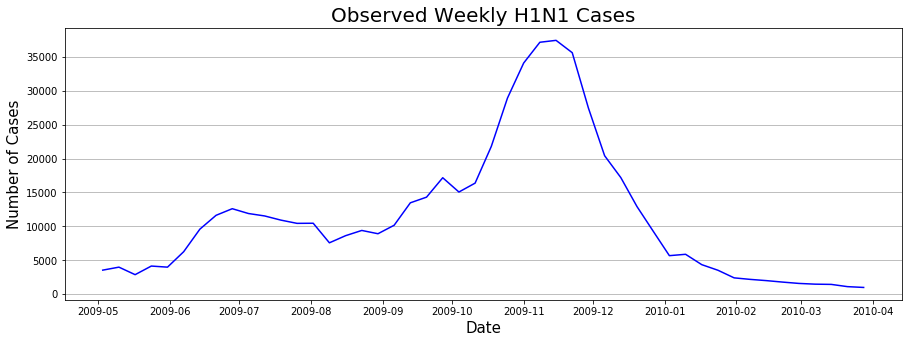

In [54]:
#Code here is used to plot Total Observed Weekly H1N1 Cases:

#group trimmed flu data by EDATE
who_total = trimmed_flu_data.groupby(["EDATE"])

#grab sum
who_vol = who_total["H1N1_Cases"].sum()

#reset index
who_vol.sort_index(inplace = True)

#plot data
plt.figure(figsize = (15,5))
main_plot = plt.plot( who_vol, color = "blue", label = "Cases")
plt.tick_params(axis = 'both', labelsize = 10)

ax = plt.axes()

#set titles and axis labels
plt.title("Observed Weekly H1N1 Cases", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.grid(axis = 'y')
plt.savefig("plots/total_observed_h1n1_cases.png")
plt.show()

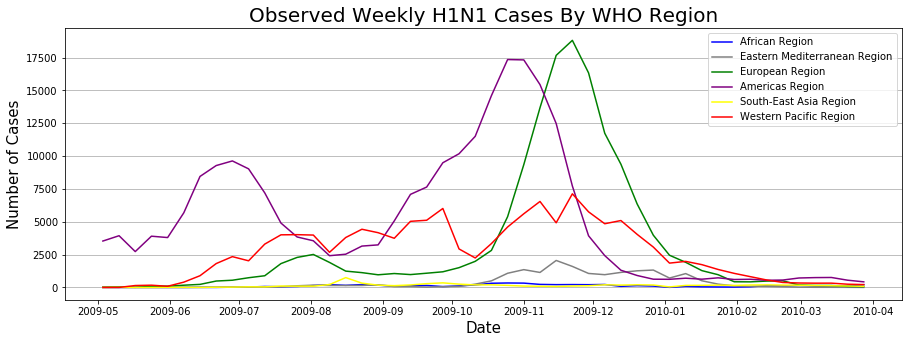

In [55]:
#Code here is used to plot Total Observed Weekly H1N1 Cases BY REGION:

#create filtered dataframes
african = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'African Region of WHO']
eastern = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'Eastern Mediterranean Region of WHO']
european = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'European Region of WHO']
americas = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'Region of the Americas of WHO']
southeast = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'South-East Asia Region of WHO']
western_pacific = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'Western Pacific Region of WHO']

#group by EDATE
african_grouped = african.groupby(['EDATE'])
eastern_grouped = eastern.groupby(['EDATE'])
european_grouped = european.groupby(['EDATE'])
americas_grouped = americas.groupby(['EDATE'])
southeast_grouped = southeast.groupby(['EDATE'])
western_pacific_grouped = western_pacific.groupby(['EDATE'])

#grab summed cases
african_vol = african_grouped["H1N1_Cases"].sum()
eastern_vol = eastern_grouped["H1N1_Cases"].sum()
european_vol = european_grouped["H1N1_Cases"].sum()
americas_vol = americas_grouped["H1N1_Cases"].sum()
southeast_vol = southeast_grouped["H1N1_Cases"].sum()
western_pacific_vol = western_pacific_grouped["H1N1_Cases"].sum()

#plot lines
plt.figure(figsize = (15,5))
african_plot = plt.plot(african_vol, color="blue", label = "African Region")
eastern_plot, = plt.plot(eastern_vol , color="gray", label = "Eastern Mediterranean Region")
european_plot, = plt.plot(european_vol , color="green", label = "European Region")
americas_plot, = plt.plot(americas_vol , color="purple", label = "Americas Region")
southeast_plot, = plt.plot(southeast_vol , color="yellow", label = "South-East Asia Region")
western_pacific_plot, = plt.plot(western_pacific_vol , color="red", label = "Western Pacific Region")

#set titles and axis labels
plt.title("Observed Weekly H1N1 Cases By WHO Region", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.legend(loc = "best")
plt.grid(axis = 'y')
plt.savefig("plots/region_observed_h1n1_cases.png")
plt.show()

# H1N1 Flight Data Portion

In [56]:
#create average flight dataframe
avg_flight_df = flight_data_df.groupby(['Month']).mean()

#drop Year columns in average flight df
del avg_flight_df['Year']

#preview flight df
avg_flight_df.head()

,DOMESTIC,INTERNATIONAL,TOTAL
Month,,,
1,709095.588235,114327.058824,823422.647059
2,654495.647059,103400.117647,757895.764706
3,756308.000000,118632.764706,874940.764706
4,735376.470588,115093.529412,850470.000000
5,760489.588235,116253.823529,876743.411765


In [57]:
#create USA specific df
usa_df = trimmed_flu_data.loc[trimmed_flu_data["Country"] == 'United States of America']

#group by Year and Month
usa_df = usa_df.groupby(['Year', 'Month']).sum()

#remove columns
del usa_df['Week']

#merge usa flight and flu data
merged_df = pd.merge(flight_data_df, usa_df, on = ['Year', 'Month'], how="inner")

#do a second merge to add average flight df
merged_df = pd.merge(merged_df, avg_flight_df, on = 'Month', how = "inner", suffixes = ("", "_AVG"))


merged_df.sort_values(by = ['Date'], inplace = True, ascending = True, axis = 0)

merged_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date,H1N1_Cases,DOMESTIC_AVG,INTERNATIONAL_AVG,TOTAL_AVG
0,2009,5,749196.0,99434.0,848630.0,2009-05-01,11309.0,760489.588235,116253.823529,876743.411765
1,2009,6,760357.0,106627.0,866984.0,2009-06-01,15129.0,764665.882353,119949.294118,884615.176471
2,2009,7,794188.0,115443.0,909631.0,2009-07-01,8922.0,793565.470588,128120.823529,921686.294118
3,2009,8,781510.0,113768.0,895278.0,2009-08-01,7425.0,790749.882353,125386.764706,916136.647059
4,2009,9,709954.0,97400.0,807354.0,2009-09-01,9653.0,722832.411765,108249.235294,831081.647059
5,2009,10,726799.0,98788.0,825587.0,2009-10-01,28330.0,754037.333333,108728.944444,862766.277778
6,2009,11,694945.0,97589.0,792534.0,2009-11-01,22571.0,714020.277778,105267.888889,819288.166667
7,2009,12,705101.0,106367.0,811468.0,2009-12-01,2338.0,725590.333333,115097.222222,840687.555556
8,2010,1,695109.0,108804.0,803913.0,2010-01-01,1397.0,709095.588235,114327.058824,823422.647059
9,2010,2,623211.0,96264.0,719475.0,2010-02-01,1104.0,654495.647059,103400.117647,757895.764706


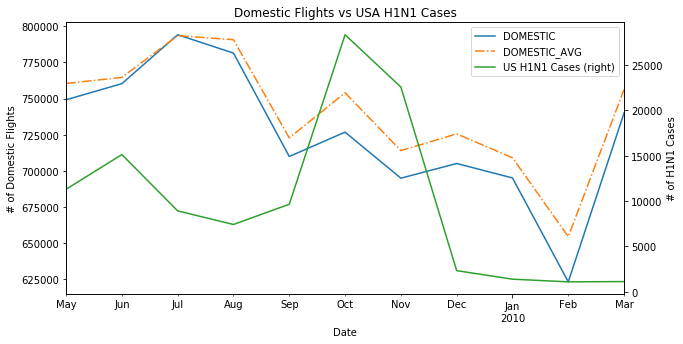

In [58]:
#plotting the USA data

plt.figure(figsize = (10,5))
ax = plt.gca()


merged_df.plot.line(x = 'Date', y='DOMESTIC', ax=ax)
merged_df.plot.line(x = 'Date', y = 'DOMESTIC_AVG', ax=ax, linestyle = '-.')

#create a second axis that contains the H1N1 Case data
ax2 = merged_df.plot.line(x = 'Date', y='H1N1_Cases', ax=ax, secondary_y = True, label = 'US H1N1 Cases')

#set titles and labels
plt.title("Domestic Flights vs USA H1N1 Cases")
ax.set_ylabel('# of Domestic Flights')
ax2.set_ylabel('# of H1N1 Cases')

#save and show chart
plt.savefig("plots/line_domestic_flights_vs_h1n1.png")
plt.show()

The r-squared is: 0.1928656967672986


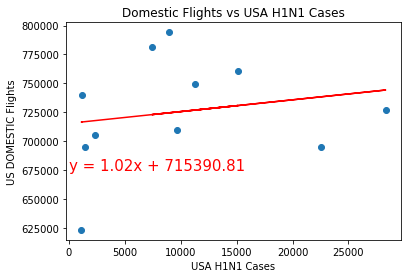

In [59]:
#run scatter plot and calculate r square
x_values = merged_df['H1N1_Cases']
y_values = merged_df['DOMESTIC']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,675000),fontsize=15,color="red")
plt.xlabel('USA H1N1 Cases')
plt.ylabel('US DOMESTIC Flights')
plt.title("Domestic Flights vs USA H1N1 Cases")
print(f"The r-squared is: {rvalue}")
plt.savefig("plots/scatter_domestic_flights_vs_h1n1.png")
plt.show()

In [60]:
#create International specific df
intl_df = trimmed_flu_data.loc[trimmed_flu_data["Country"] != 'United States of America']

#group by Year and Month
intl_df = intl_df.groupby(['Year', 'Month']).sum()

#remove columns
del intl_df['Week']

#merge International flight and flu data
intl_merged_df = pd.merge(flight_data_df, intl_df, on = ['Year', 'Month'], how="inner")

#do a second merge to add average flight df
intl_merged_df = pd.merge(intl_merged_df, avg_flight_df, on = 'Month', how = "inner", suffixes = ("", "_AVG"))


intl_merged_df.sort_values(by = ['Date'], inplace = True, ascending = True, axis = 0)

intl_merged_df

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date,H1N1_Cases,DOMESTIC_AVG,INTERNATIONAL_AVG,TOTAL_AVG
0,2009,5,749196.0,99434.0,848630.0,2009-05-01,7282.0,760489.588235,116253.823529,876743.411765
1,2009,6,760357.0,106627.0,866984.0,2009-06-01,24984.0,764665.882353,119949.294118,884615.176471
2,2009,7,794188.0,115443.0,909631.0,2009-07-01,35897.0,793565.470588,128120.823529,921686.294118
3,2009,8,781510.0,113768.0,895278.0,2009-08-01,37581.0,790749.882353,125386.764706,916136.647059
4,2009,9,709954.0,97400.0,807354.0,2009-09-01,45482.0,722832.411765,108249.235294,831081.647059
5,2009,10,726799.0,98788.0,825587.0,2009-10-01,53825.0,754037.333333,108728.944444,862766.277778
6,2009,11,694945.0,97589.0,792534.0,2009-11-01,149107.0,714020.277778,105267.888889,819288.166667
7,2009,12,705101.0,106367.0,811468.0,2009-12-01,57493.0,725590.333333,115097.222222,840687.555556
8,2010,1,695109.0,108804.0,803913.0,2010-01-01,20498.0,709095.588235,114327.058824,823422.647059
9,2010,2,623211.0,96264.0,719475.0,2010-02-01,6484.0,654495.647059,103400.117647,757895.764706


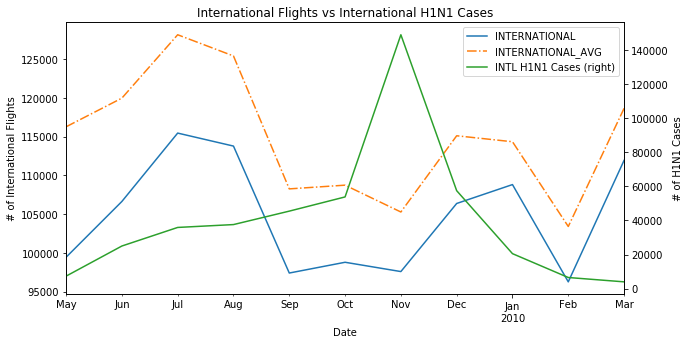

In [61]:
#plotting the International data

plt.figure(figsize = (10,5))
ax = plt.gca()

intl_merged_df.plot.line(x = 'Date', y='INTERNATIONAL', ax=ax)
intl_merged_df.plot.line(x = 'Date', y = 'INTERNATIONAL_AVG', ax=ax, linestyle = '-.')

#create a second axis that contains the H1N1 Case data
ax3 = intl_merged_df.plot.line(x = 'Date', y='H1N1_Cases', ax=ax, secondary_y = True, label = 'INTL H1N1 Cases')

#set titles and labels
plt.title("International Flights vs International H1N1 Cases")
ax.set_ylabel('# of International Flights')
ax3.set_ylabel('# of H1N1 Cases')

#show chart
plt.savefig("plots/line_intl_flights_vs_h1n1.png")
plt.show()

The r-squared is: -0.10189615898805172


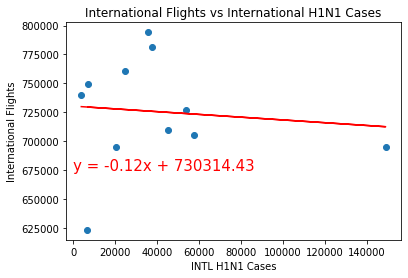

In [62]:
#run scatter plot and calculate r square
x_values = intl_merged_df['H1N1_Cases']
y_values = intl_merged_df['DOMESTIC']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,675000),fontsize=15,color="red")
plt.xlabel('INTL H1N1 Cases')
plt.ylabel('International Flights')
plt.title("International Flights vs International H1N1 Cases")
print(f"The r-squared is: {rvalue}")
plt.savefig("plots/scatter_intl_flights_vs_h1n1.png")
plt.show()

# H1N1 HeatMap Portion

In [63]:
lat_lng_df = lat_lng_df.replace(to_replace=['United States'],
                value='United States of America')

In [64]:
#create summary dataframe
who_country = flu_data.groupby('Country').sum()
who_summary = pd.DataFrame ({
                "H1N1 Case Count": who_country['H1N1_Cases']
})

who_summary.sort_values(by = ['H1N1 Case Count'], inplace = True, ascending = False, axis = 0)

who_summary = who_summary.reset_index()

max_cases = who_summary["H1N1 Case Count"].max()

h1n1_countries_latlng = pd.merge(who_summary, lat_lng_df, on = 'Country')

h1n1_countries_latlng.head()

who_summary


,Country,H1N1 Case Count
0,United States of America,110332.0
1,China,73117.0
2,Mexico,72573.0
3,Canada,39770.0
4,Japan,32760.0
...,...,...
166,Saudi Arabia,0.0
167,Chad,0.0
168,Seychelles,0.0
169,Sierra Leone,0.0


In [65]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

locations = h1n1_countries_latlng[["Latitude", "Longitude"]]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=h1n1_countries_latlng['H1N1 Case Count'], 
                                 dissipating=False, max_intensity=max_cases)

# Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

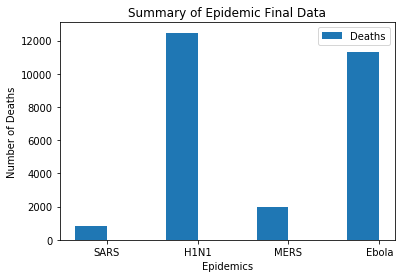

In [67]:
deaths = (s_final_summary['Deaths'], 12469, 2000, final_ebola_deaths)

x = np.arange(4) 
width = 0.35       

plt.bar(x, deaths, width, label='Deaths')

#plt.bar(x + width, cases, width, label='Cases')
plt.xlabel('Epidemics')
plt.ylabel('Number of Deaths')
plt.title('Summary of Epidemic Final Data')
plt.xticks(x + width / 2, ('SARS', 'H1N1', 'MERS', 'Ebola'))
plt.legend(loc='best')
plt.show()


# MERS (Maria Soto)